# DATA COLLECTION

In [116]:
from apiclient.discovery import build
import argparse
import csv
import json

In [117]:
DEVELOPER_KEY = "***"
YOUTUBE_API_SERVICE_NAME = "youtube"
YOUTUBE_API_VERSION = "v3"

In [118]:
youtube = build(YOUTUBE_API_SERVICE_NAME, YOUTUBE_API_VERSION, developerKey=DEVELOPER_KEY)

### Calling search().list() to retreive search results for query

In [467]:
topic="Data Science"
search_response = youtube.search().list(q=topic,type="video",part="id,snippet", maxResults=50).execute()
VId=[]
for i in range(50):
    VId.append(search_response["items"][i]["id"]["videoId"])
for j in range(10):
    search_response = youtube.search().list(pageToken=search_response["nextPageToken"],q=topic,type="video",part="id,snippet", maxResults=50).execute()
    for i in range(50):
        VId.append(search_response["items"][i]["id"]["videoId"])

In [468]:
len(VId)

550

In [469]:
NVId=[]
for i in range(0,550,50):
    a=VId[i]
    for j in range(i+1,i+50):
        a=a+','+VId[j]
    NVId.append(a)
NVId

['X3paOmcrTjQ,-ETQ97mXXF0,XOgx6OyGF1Y,KdgQvgE3ji4,csG_qfOTvxw,GJaYfNiY4to,u2zsY-2uZiE,tBU65SsJG_8,qcqT5SqE8BY,4OZip0cgOho,iLcvvVXBSFo,xC-c7E5PK0Y,S8MmsBsGP-Q,Scg59_McA8Q,de7ZUb1fH3s,im1Xkj9gU9s,ua-CiDNNj30,dYZJxhYjBE8,bRohws1bo1U,cVxELmATmOU,Hpjm2I913Uw,V1i33BaEVng,Gzpa36HKXCQ,Rr4i9l80Ecs,Vs_ko7lF71w,qoxCynmob7I,BgpIzWmcEhA,vs9U0uQvido,iJUzouXg5kY,NXoN3-BZpsQ,lSwIe0TMUhc,Dqg9TmkoX9I,FCltgGLSt3Q,aK506baLAGA,81glyreIXPk,5b9Z8toVaAU,-6RqxhNO2yY,V4PcJolwgvw,ZFkI8wHOXyA,k7zu3NXEiGY,K-ss_ag2k9E,wBoCcc_SDVg,hfHBdkHkYDw,tQYCd8tg56U,uIONlX5ZUbU,u8gDK-riNvE,W3vrMSah3rc,YhoWmgtLpyQ,repvSAPjB-s,vfiLvg5VMrY',
 '3XD5nU6qwPM,ggdXJJNh7-k,D0AocXiPNMY,Ja1C0Uv-Gz4,lDkTNURDIaY,Vsi2Wn6mAlc,FjQ6bxzCGuY,IUDt6-Jl3gc,-OcumqFbu0U,q2Ruz1dHnow,FsIjQPchdOw,OcVMcsK43U0,3dEb_FanLTU,ccZ2pyr3YDw,-rSMFbK98tg,AycMp7X9Z20,w-IdSp_mQuM,17S8wGuK7d0,20WI4OxVGMY,0W_d_Utak78,nx489B78ZJ4,-soQn2RBIdU,L_SZQKv5Cl0,-_VOUvS52aI,R0LyBsSQd94,JPxr3mP8Gy0,LJrK4B7bNWA,bzS-e0yfSp4,edvg4eHi_Mw,bkcAmCqIaao,zNoLeZi5gpk,k2P_pHQDlp0,Ph5DHoWHW2

### Calling videos().list() to retreive various details of the video

In [470]:
t_res=[]
res=youtube.videos().list(id=NVId[0],part='statistics,snippet,contentDetails,status', fields="items(id,snippet(publishedAt,title,defaultLanguage,defaultAudioLanguage),contentDetails(duration),statistics,status(privacyStatus,publicStatsViewable))").execute()
for k in range(50):
    t_res.append(res["items"][k])
for i in range(1,11):
    res=youtube.videos().list(id=NVId[i],part='statistics,snippet,contentDetails,status', fields="items(id,snippet(publishedAt,title,defaultLanguage,defaultAudioLanguage),contentDetails(duration),statistics,status(privacyStatus,publicStatsViewable))").execute()
    for k in range(50):
        t_res.append(res["items"][k])

In [471]:
len(t_res)

550

In [472]:
import csv
from datetime import datetime
p = csv.writer(open("t2.csv","w",newline=''))
t = t_res
h = ["Topic","TimeQueried","Video_Title","Video_ID","Published_At","Duration","Views","Likes","Dislikes","Favorite_Count"]
p.writerow(h)
for i in t:
    if "likeCount" not in i["statistics"]:
        i["statistics"]["likeCount"]=0
    if "dislikeCount" not in i["statistics"]:
        i["statistics"]["dislikeCount"]=0
    #Writing into the csv file
    p.writerow(["Data Structures",
                datetime.now().strftime("%Y-%m-%dT%H:%M:%SZ"),
                i["snippet"]["title"].encode("utf-8"),
                i["id"],
                i["snippet"]["publishedAt"],
                i["contentDetails"]["duration"],
                i["statistics"]["viewCount"],
                i["statistics"]["likeCount"],
                i["statistics"]["dislikeCount"],
                i["statistics"]["favoriteCount"]])

# Cleaning the data

In [165]:
import pandas as pd
df=pd.read_csv('t2.csv')

In [166]:
print("Number of unique values are: ",df["Video_ID"].nunique())
df[df.duplicated()]
#Finding Duplicate Search results

Number of unique values are:  1409


,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count
102,Data Structures,b'N Ary Tree | Data Structures',2020-08-19T23:54:10Z,jiR8SLAOglw,2020-04-05T15:30:04Z,PT10M5S,2017,33,2,0
103,Data Structures,b'Evaluation of Postfix Expression | Examples ...,2020-08-19T23:54:10Z,84BsI5VJPq4,2018-07-25T16:05:49Z,PT4M23S,44576,569,27,0
104,Data Structures,b'Stack Abstract Data Type | Insertion & Delet...,2020-08-19T23:54:10Z,WL4InYgz1bE,2018-07-25T16:08:40Z,PT4M31S,20857,154,7,0
105,Data Structures,b'Adjacency list | Example | Graph representat...,2020-08-19T23:54:10Z,kzbvvBY8qQg,2018-08-09T02:34:06Z,PT4M21S,42403,449,31,0
107,Data Structures,b'2.9 Introduction to Doubly Linked List - Dat...,2020-08-19T23:54:10Z,nquQ_fYGGA4,2019-08-17T06:28:21Z,PT8M54S,33886,607,15,0
109,Data Structures,b'Coursera: 9.4 Assignment solution// Python d...,2020-08-19T23:54:10Z,r9ZhaDInfpg,2020-05-25T05:13:17Z,PT8M10S,2137,26,3,0
110,Data Structures,b'Data Structures in Python: Stack -- The Stac...,2020-08-19T23:54:10Z,lVFnq4zbs-g,2017-05-04T22:07:19Z,PT10M40S,113753,1273,18,0
112,Data Structures,b'Coursera: Python Data Structures Complete Co...,2020-08-19T23:54:10Z,vIoEDdSzmcg,2020-08-04T04:24:48Z,PT1H43M34S,1195,33,0,0
113,Data Structures,b'Real Life Projects \xf0\x9f\x98\x8eusing Dat...,2020-08-19T23:54:10Z,iIumrTpJBjk,2020-05-14T17:37:42Z,PT59M33S,20214,690,20,0
114,Data Structures,b'Data Structures Applications | Learn Data St...,2020-08-19T23:54:10Z,SCaH7tehxN0,2020-04-17T10:33:00Z,PT4M43S,1421,88,0,0


In [167]:
dh=df.drop_duplicates()
dh=dh.reset_index()
#Removing Duplicate Videos
dh

,index,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count
0,0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,PT8M29S,264898,6250,134,0
1,1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,PT8H3M17S,1540050,39366,376,0
2,2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,PT16M35S,1202977,23419,387,0
3,3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,PT31M43S,129621,10830,121,0
4,4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,PT1H21M49S,154553,2497,126,0
5,5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,PT4M42S,263009,5757,90,0
6,6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,PT11M38S,6057,796,15,0
7,7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,PT7M23S,405885,25763,298,0
8,8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,PT15M27S,47180,1081,19,0
9,9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,PT31M33S,431193,5014,284,0


In [168]:
dh.drop('index', axis=1, inplace=True)
#dropping the old index column
dh

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count
0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,PT8M29S,264898,6250,134,0
1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,PT8H3M17S,1540050,39366,376,0
2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,PT16M35S,1202977,23419,387,0
3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,PT31M43S,129621,10830,121,0
4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,PT1H21M49S,154553,2497,126,0
5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,PT4M42S,263009,5757,90,0
6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,PT11M38S,6057,796,15,0
7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,PT7M23S,405885,25763,298,0
8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,PT15M27S,47180,1081,19,0
9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,PT31M33S,431193,5014,284,0


In [169]:
import isodate
import datetime
for i in range(len(dh.index)):
    dur=isodate.parse_duration(dh["Duration"][i])
    dh["Duration"][i]=dur.total_seconds()
#Converting Video duration into seconds

C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Filtering the Data

In [170]:
dh = dh[dh.Likes != 0]
dh=dh.reset_index()
dh.drop('index', axis=1, inplace=True)
dh

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count
0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,509,264898,6250,134,0
1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,28997,1540050,39366,376,0
2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,995,1202977,23419,387,0
3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,1903,129621,10830,121,0
4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,4909,154553,2497,126,0
5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,282,263009,5757,90,0
6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,698,6057,796,15,0
7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,443,405885,25763,298,0
8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,927,47180,1081,19,0
9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,1893,431193,5014,284,0


#### Dropping the Videos which are having duration  of less than a minute as it may be Advertisemnts and those wont be beneficial for our playlist and affects our scoring function

In [199]:
dh=dh[dh['Duration'] > 60]
dh=dh.reset_index()
dh.drop('index', axis=1, inplace=True)
dh

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count
0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,509,264898,6250,134,0
1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,28997,1540050,39366,376,0
2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,995,1202977,23419,387,0
3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,1903,129621,10830,121,0
4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,4909,154553,2497,126,0
5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,282,263009,5757,90,0
6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,698,6057,796,15,0
7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,443,405885,25763,298,0
8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,927,47180,1081,19,0
9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,1893,431193,5014,284,0


## Computing Scoring Function

In [172]:
cols = list(dh.columns)
cols.remove('Topic')
cols.remove('Video_Title')
cols.remove('TimeQueried')
cols.remove('Video_ID')
cols.remove('Published_At')
cols.remove('Duration')
cols.remove('Favorite_Count')
dh[cols]

,Views,Likes,Dislikes
0,264898,6250,134
1,1540050,39366,376
2,1202977,23419,387
3,129621,10830,121
4,154553,2497,126
5,263009,5757,90
6,6057,796,15
7,405885,25763,298
8,47180,1081,19
9,431193,5014,284


In [173]:
dh1 = dh[dh["Topic"] == "Data Structures"]
dh2 = dh[dh["Topic"] == "Fluid Mechanics"]
dh3 = dh[dh["Topic"] == "Data Science"]

In [174]:
cols = list(dh1.columns)
cols.remove('Topic')
cols.remove('Video_Title')
cols.remove('TimeQueried')
cols.remove('Video_ID')
cols.remove('Published_At')
cols.remove('Favorite_Count')
dh1[cols]

,Duration,Views,Likes,Dislikes
0,509,264898,6250,134
1,28997,1540050,39366,376
2,995,1202977,23419,387
3,1903,129621,10830,121
4,4909,154553,2497,126
5,282,263009,5757,90
6,698,6057,796,15
7,443,405885,25763,298
8,927,47180,1081,19
9,1893,431193,5014,284


In [175]:
for c in cols:
    c_zscore = c + '_zscore'
    dh1[c_zscore] = (dh1[c] - dh1[c].mean())/dh1[c].std(ddof=0)
    dh2[c_zscore] = (dh2[c] - dh2[c].mean())/dh2[c].std(ddof=0)
    dh3[c_zscore] = (dh3[c] - dh3[c].mean())/dh3[c].std(ddof=0)
dh1

C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count,Duration_zscore,Views_zscore,Likes_zscore,Dislikes_zscore
0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,509,264898,6250,134,0,-0.374589,0.701489,1.229137,1.125516
1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,28997,1540050,39366,376,0,10.0154,6.432426,10.206967,4.171588
2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,995,1202977,23419,387,0,-0.197338,4.917513,5.883696,4.310046
3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,1903,129621,10830,121,0,0.133821,0.093511,2.470787,0.961884
4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,4909,154553,2497,126,0,1.23015,0.205564,0.211690,1.024819
5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,282,263009,5757,90,0,-0.457379,0.692999,1.095484,0.571684
6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,698,6057,796,15,0,-0.305658,-0.461825,-0.249456,-0.372347
7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,443,405885,25763,298,0,-0.39866,1.335129,6.519160,3.189796
8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,927,47180,1081,19,0,-0.222139,-0.277005,-0.172191,-0.321998
9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,1893,431193,5014,284,0,0.130174,1.448871,0.894055,3.013577


In [180]:
#Scoring Function Equation
a=0.7       #Weight of Views
b=0.4       #Weight of Likes
c=-0.3      #Weight of DisLikes
d=0.2       #Weight of Duration
dh1["Scores"]=dh1["Views_zscore"]*a+dh1["Likes_zscore"]*b+dh1["Dislikes_zscore"]*c+dh1["Duration_zscore"]*d
dh2["Scores"]=dh2["Views_zscore"]*a+dh2["Likes_zscore"]*b+dh2["Dislikes_zscore"]*c+dh2["Duration_zscore"]*d
dh3["Scores"]=dh3["Views_zscore"]*a+dh3["Likes_zscore"]*b+dh3["Dislikes_zscore"]*c+dh3["Duration_zscore"]*d
dh2.sort_values(by='Scores', ascending=False)

C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\ajayb\Anaconda3\envs\py35\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count,Duration_zscore,Views_zscore,Likes_zscore,Dislikes_zscore,Scores
463,Fluid Mechanics,b'Fluids in Motion: Crash Course Physics #15',2020-08-20T00:06:19Z,fJefjG3xhW0,2016-07-14T21:55:06Z,587,638327,9923,221,0,-0.571187,7.097743,5.945554,4.639027,5.8407
459,Fluid Mechanics,b'12:00 PM | Mechanical by Neeraj Sir | Day #1...,2020-08-20T00:06:19Z,XKHRdnaHzmI,2018-07-07T09:24:09Z,9444,384896,14443,316,0,1.51076,4.045857,8.942421,6.880787,4.64698
455,Fluid Mechanics,b'10:00 AM - RRB JE 2019 (CBT-2) | Complete Fl...,2020-08-20T00:06:19Z,hv_Vixhp7us,2019-08-04T12:14:36Z,22503,293519,9804,160,0,4.58044,2.945470,5.866655,3.199581,4.3647
530,Fluid Mechanics,b'Lec-1 Fluid Mechanics',2020-08-20T00:06:19Z,F_7OhKUYV5c,2008-01-28T08:57:32Z,3066,595222,1207,106,0,0.011532,6.578661,0.166641,1.925317,4.09643
714,Fluid Mechanics,b'Metacenter Definition | Fluid Mechanics',2020-08-20T00:06:19Z,QUgXf2Rj2YQ,2013-09-10T13:12:00Z,219,481733,4328,98,0,-0.65769,5.211995,2.235937,1.736538,3.89027
470,Fluid Mechanics,"b'Fluid Mechanics: Fundamental Concepts, Fluid...",2020-08-20T00:06:19Z,clVwKynHpB0,2015-12-15T18:11:12Z,3333,454382,3064,40,0,0.0742936,4.882627,1.397876,0.367884,3.88148
465,Fluid Mechanics,b'JEE Mains: Fluid Mechanics - L1 | Fluid Stat...,2020-08-20T00:06:19Z,S2a8AO13q7Q,2019-11-04T14:43:05Z,3931,305814,11067,294,0,0.214861,3.093530,6.704053,6.361642,2.98157
635,Fluid Mechanics,b'Fluid Mechanics | Syllabus Analysis of Fluid...,2020-08-20T00:06:19Z,iTanaNwMDKo,2018-04-12T13:31:31Z,1320,331187,5253,120,0,-0.398887,3.399079,2.849234,2.255682,2.76257
447,Fluid Mechanics,b'Complete Revision (All Formula & Concept) | ...,2020-08-20T00:06:19Z,99vjO6Da2SU,2020-01-19T02:30:01Z,24170,160043,4560,47,0,4.97229,1.338115,2.389759,0.533066,2.72712
584,Fluid Mechanics,"b""Bernoulli's Equation, Fluid Mechanics""",2020-08-20T00:06:19Z,vhSCH_FPJC4,2015-01-06T18:14:11Z,691,528057,7600,483,0,-0.546741,5.769842,4.405351,10.821565,2.44521


In [181]:
frames=[dh1,dh2,dh3]
dc=pd.concat(frames) #Merging all Topics Dataframes
dc

,Topic,Video_Title,TimeQueried,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count,Duration_zscore,Views_zscore,Likes_zscore,Dislikes_zscore,Scores
0,Data Structures,b'INTRODUCTION TO DATA STRUCTURES',2020-08-19T23:54:10Z,DFpWCl_49i0,2019-05-08T17:10:01Z,509,264898,6250,134,0,-0.374589,0.701489,1.229137,1.125516,0.570125
1,Data Structures,b'Data Structures Easy to Advanced Course - Fu...,2020-08-19T23:54:10Z,RBSGKlAvoiM,2019-09-19T14:39:38Z,28997,1540050,39366,376,0,10.0154,6.432426,10.206967,4.171588,9.33708
2,Data Structures,b'Data Structures & Algorithms #1 - What Are D...,2020-08-19T23:54:10Z,bum_19loj9A,2018-03-12T05:19:30Z,995,1202977,23419,387,0,-0.197338,4.917513,5.883696,4.310046,4.46326
3,Data Structures,b'Introduction to Data Structures & Algorithms',2020-08-19T23:54:10Z,5_5oE5lgrhw,2020-07-30T16:44:15Z,1903,129621,10830,121,0,0.133821,0.093511,2.470787,0.961884,0.791972
4,Data Structures,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",2020-08-19T23:54:10Z,ytgKbIpddH8,2019-08-06T14:05:40Z,4909,154553,2497,126,0,1.23015,0.205564,0.211690,1.024819,0.167154
5,Data Structures,b'#1 What is Data Structure? | Why it is so Im...,2020-08-19T23:54:10Z,jc1t0KFsOcs,2017-12-16T11:20:25Z,282,263009,5757,90,0,-0.457379,0.692999,1.095484,0.571684,0.660312
6,Data Structures,b'DS ALGO v/s Competitive Programming | How to...,2020-08-19T23:54:10Z,IiAL14tIkZY,2020-08-19T06:30:14Z,698,6057,796,15,0,-0.305658,-0.461825,-0.249456,-0.372347,-0.372487
7,Data Structures,b'DATA STRUCTURES you MUST know (as a Software...,2020-08-19T23:54:10Z,sVxBVvlnJsM,2019-12-24T00:22:56Z,443,405885,25763,298,0,-0.39866,1.335129,6.519160,3.189796,2.50558
8,Data Structures,b'What is Data Structures? & Why we need them?...,2020-08-19T23:54:10Z,NzUVn8Y9deQ,2019-02-10T15:00:03Z,927,47180,1081,19,0,-0.222139,-0.277005,-0.172191,-0.321998,-0.210608
9,Data Structures,b'Data Structures Using C/C++ (HINDI/URDU)',2020-08-19T23:54:10Z,SAzD-oBcmbk,2015-08-07T15:03:55Z,1893,431193,5014,284,0,0.130174,1.448871,0.894055,3.013577,0.493793


In [182]:
columns_titles=["Topic","TimeQueried","Video_Title","Video_ID","Published_At","Duration","Views","Likes","Dislikes","Favorite_Count","Scores","Duration_zscore","Views_zscore","Likes_zscore","Dislikes_zscore"]
dc=dc.reindex(columns=columns_titles)
dc

,Topic,TimeQueried,Video_Title,Video_ID,Published_At,Duration,Views,Likes,Dislikes,Favorite_Count,Scores,Duration_zscore,Views_zscore,Likes_zscore,Dislikes_zscore
0,Data Structures,2020-08-19T23:54:10Z,b'INTRODUCTION TO DATA STRUCTURES',DFpWCl_49i0,2019-05-08T17:10:01Z,509,264898,6250,134,0,0.570125,-0.374589,0.701489,1.229137,1.125516
1,Data Structures,2020-08-19T23:54:10Z,b'Data Structures Easy to Advanced Course - Fu...,RBSGKlAvoiM,2019-09-19T14:39:38Z,28997,1540050,39366,376,0,9.33708,10.0154,6.432426,10.206967,4.171588
2,Data Structures,2020-08-19T23:54:10Z,b'Data Structures & Algorithms #1 - What Are D...,bum_19loj9A,2018-03-12T05:19:30Z,995,1202977,23419,387,0,4.46326,-0.197338,4.917513,5.883696,4.310046
3,Data Structures,2020-08-19T23:54:10Z,b'Introduction to Data Structures & Algorithms',5_5oE5lgrhw,2020-07-30T16:44:15Z,1903,129621,10830,121,0,0.791972,0.133821,0.093511,2.470787,0.961884
4,Data Structures,2020-08-19T23:54:10Z,"b'Arrays, Linked Lists, Stacks, Queues, Trees,...",ytgKbIpddH8,2019-08-06T14:05:40Z,4909,154553,2497,126,0,0.167154,1.23015,0.205564,0.211690,1.024819
5,Data Structures,2020-08-19T23:54:10Z,b'#1 What is Data Structure? | Why it is so Im...,jc1t0KFsOcs,2017-12-16T11:20:25Z,282,263009,5757,90,0,0.660312,-0.457379,0.692999,1.095484,0.571684
6,Data Structures,2020-08-19T23:54:10Z,b'DS ALGO v/s Competitive Programming | How to...,IiAL14tIkZY,2020-08-19T06:30:14Z,698,6057,796,15,0,-0.372487,-0.305658,-0.461825,-0.249456,-0.372347
7,Data Structures,2020-08-19T23:54:10Z,b'DATA STRUCTURES you MUST know (as a Software...,sVxBVvlnJsM,2019-12-24T00:22:56Z,443,405885,25763,298,0,2.50558,-0.39866,1.335129,6.519160,3.189796
8,Data Structures,2020-08-19T23:54:10Z,b'What is Data Structures? & Why we need them?...,NzUVn8Y9deQ,2019-02-10T15:00:03Z,927,47180,1081,19,0,-0.210608,-0.222139,-0.277005,-0.172191,-0.321998
9,Data Structures,2020-08-19T23:54:10Z,b'Data Structures Using C/C++ (HINDI/URDU)',SAzD-oBcmbk,2015-08-07T15:03:55Z,1893,431193,5014,284,0,0.493793,0.130174,1.448871,0.894055,3.013577


In [183]:
#Saving Cleaned Data to CSV File
dc.to_csv('11740260_Data3.csv', index = False)

In [187]:
dc2=pd.read_csv('11740260_Data3.csv')

In [188]:
dc2.to_csv('11740260_Data.csv', mode='a', header=False,index=False)

In [15]:
#Ranking based on Scores
dh1=dh1.sort_values(by='Scores',ascending=False)
dh2=dh2.sort_values(by='Scores',ascending=False)
dh3=dh3.sort_values(by='Scores',ascending=False)

In [16]:
dh1.reset_index(drop=True, inplace=True)
dh2.reset_index(drop=True, inplace=True)
dh3.reset_index(drop=True, inplace=True)

## Data Visualization

(array([376.,  37.,  11.,   9.,   7.,   8.,   1.,   6.,   3.,   1.,   1.,
          0.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([8.0000000e+00, 1.1505690e+05, 2.3010580e+05, 3.4515470e+05,
        4.6020360e+05, 5.7525250e+05, 6.9030140e+05, 8.0535030e+05,
        9.2039920e+05, 1.0354481e+06, 1.1504970e+06, 1.2655459e+06,
        1.3805948e+06, 1.4956437e+06, 1.6106926e+06, 1.7257415e+06,
        1.8407904e+06, 1.9558393e+06, 2.0708882e+06, 2.1859371e+06,
        2.3009860e+06]),
 <a list of 1 Patch objects>)

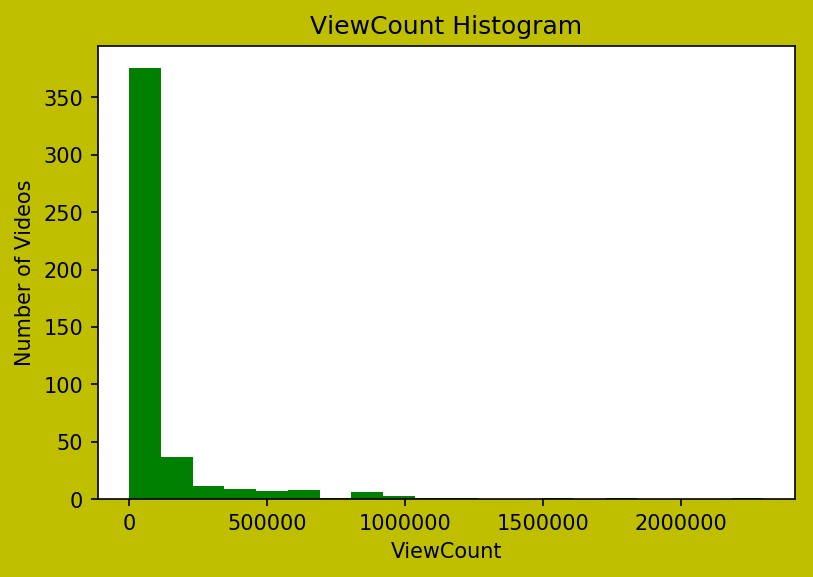

In [90]:
plt.figure(dpi=150,facecolor='y')
plt.title("ViewCount Histogram")
plt.xlabel('ViewCount')
plt.ylabel('Number of Videos')
plt.hist(dh1["Views"], bins=20,histtype='stepfilled',color='Green')

Text(0.5, 1.0, 'Data Structures')

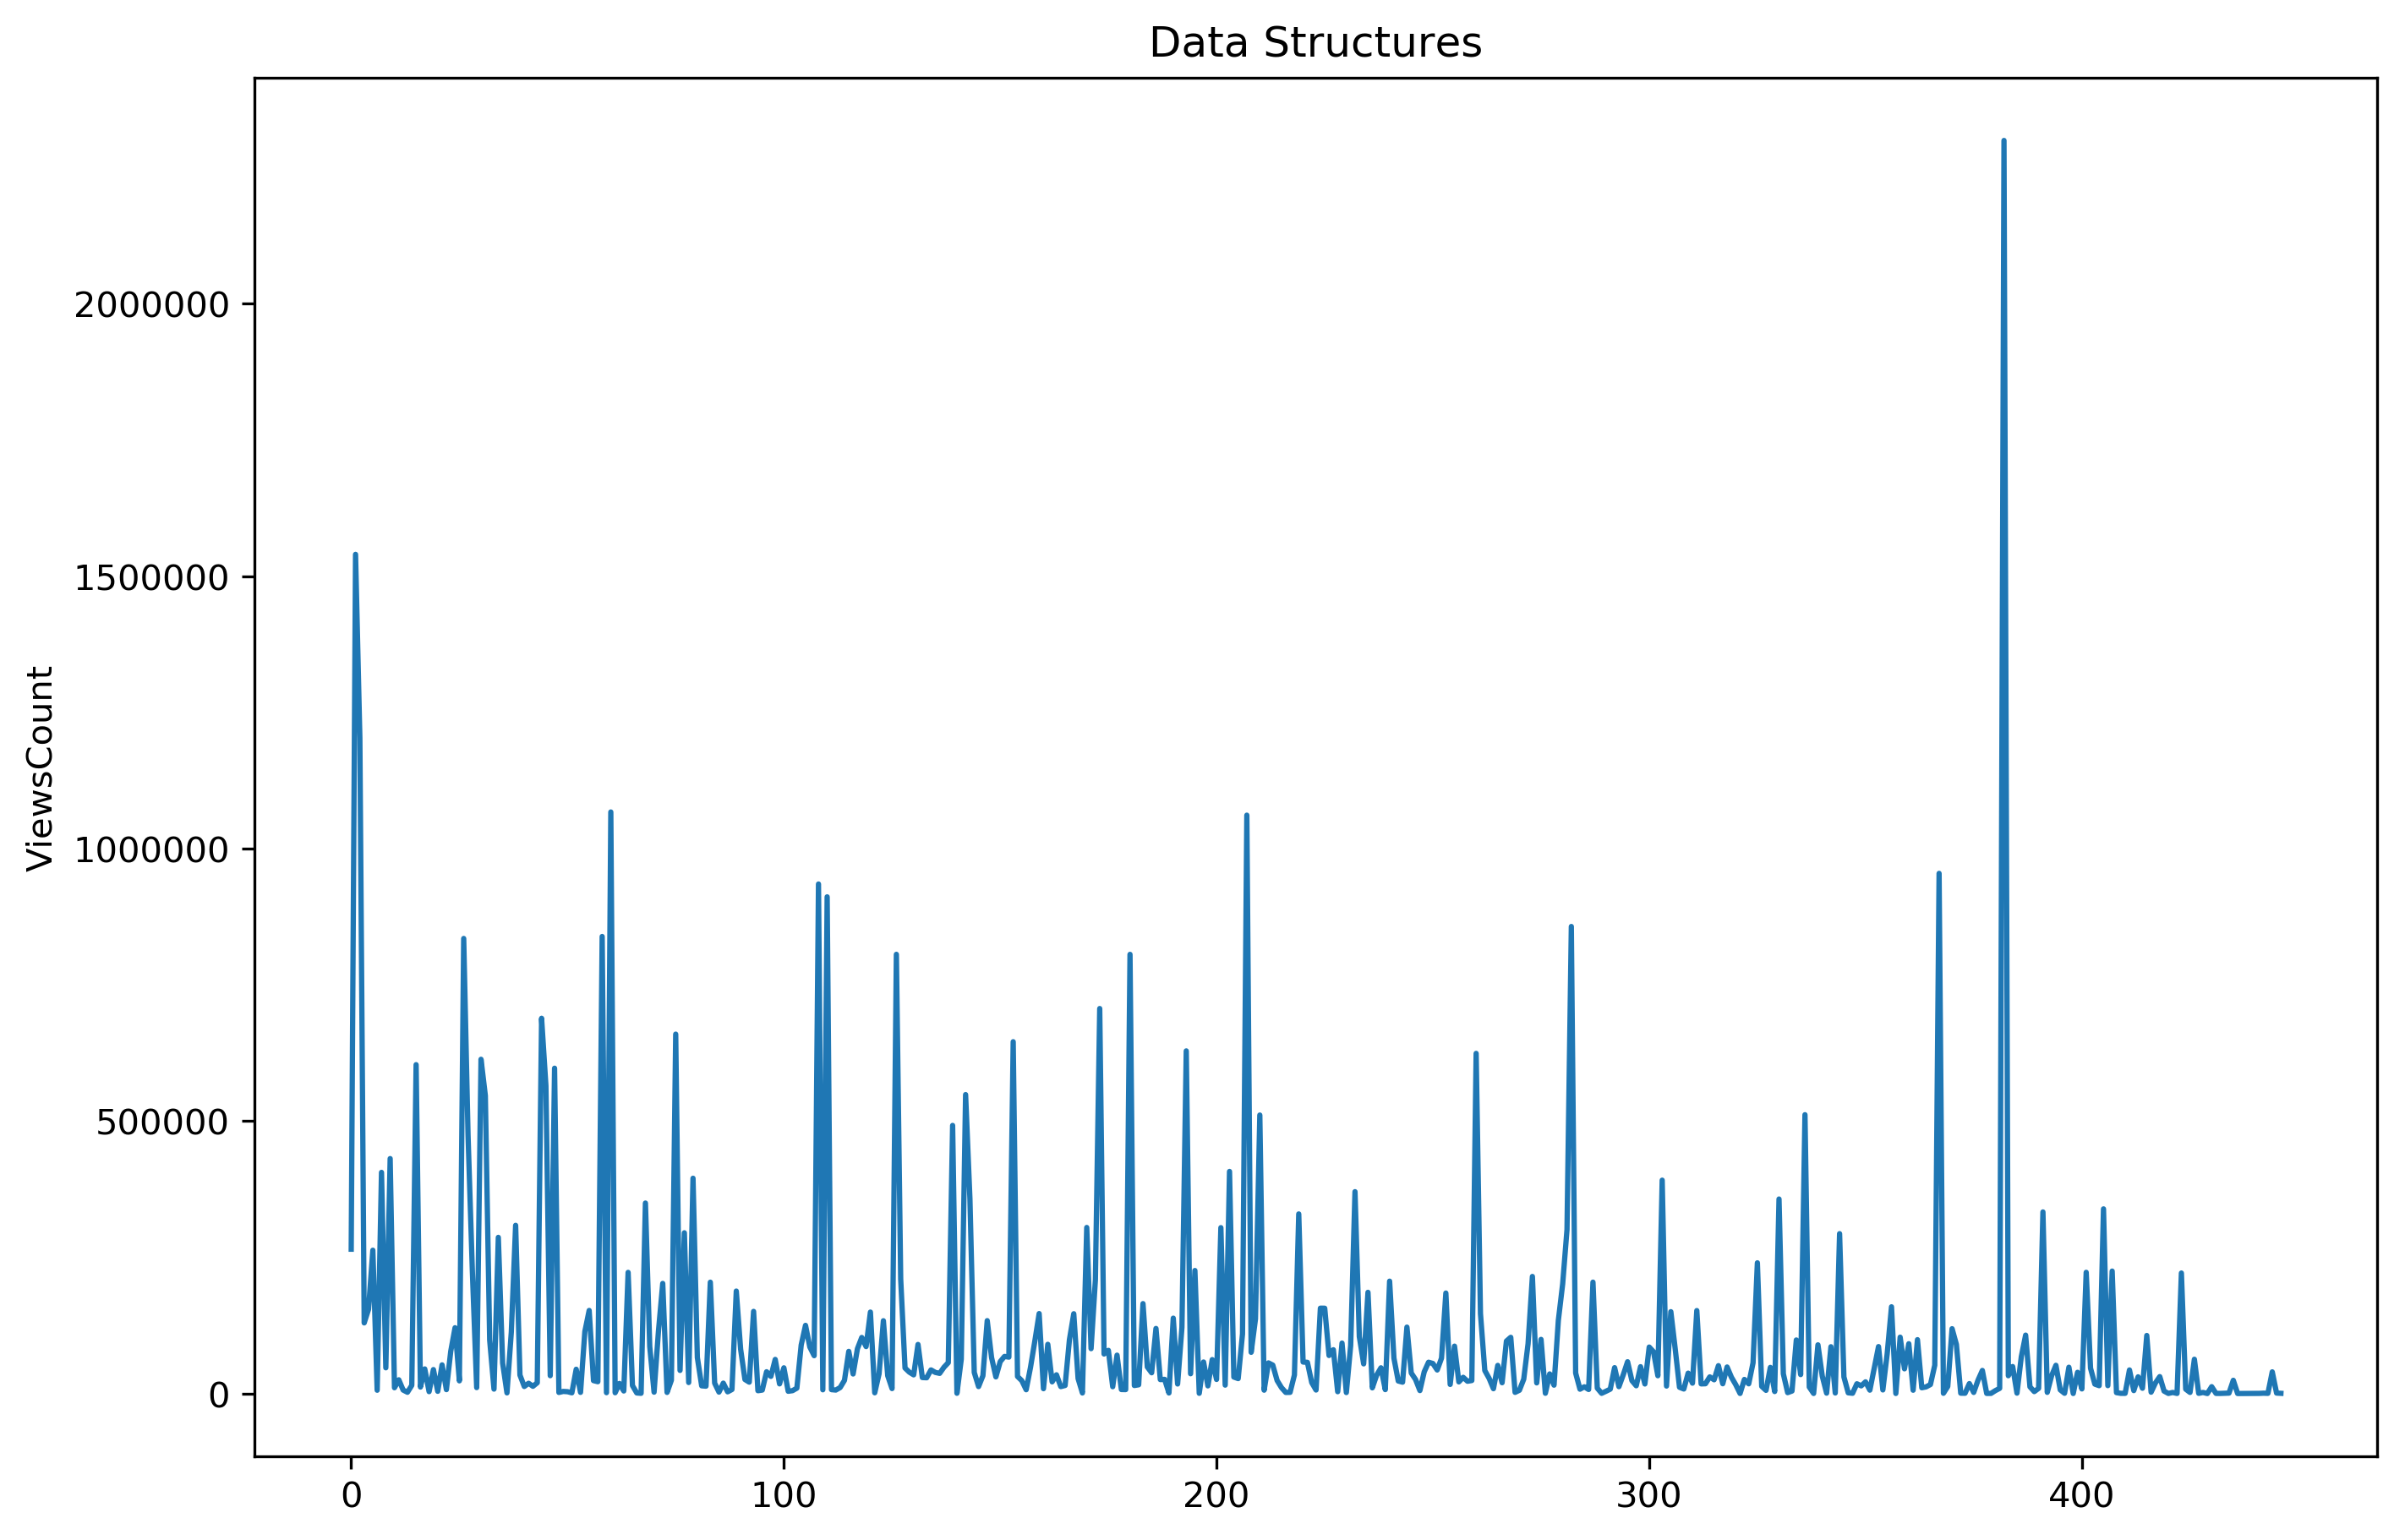

In [202]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.plot(dh1["Views"])
plt.ylabel('ViewsCount')
plt.title("Data Structures")

Text(0.5, 1.0, 'Fluid Mechanics')

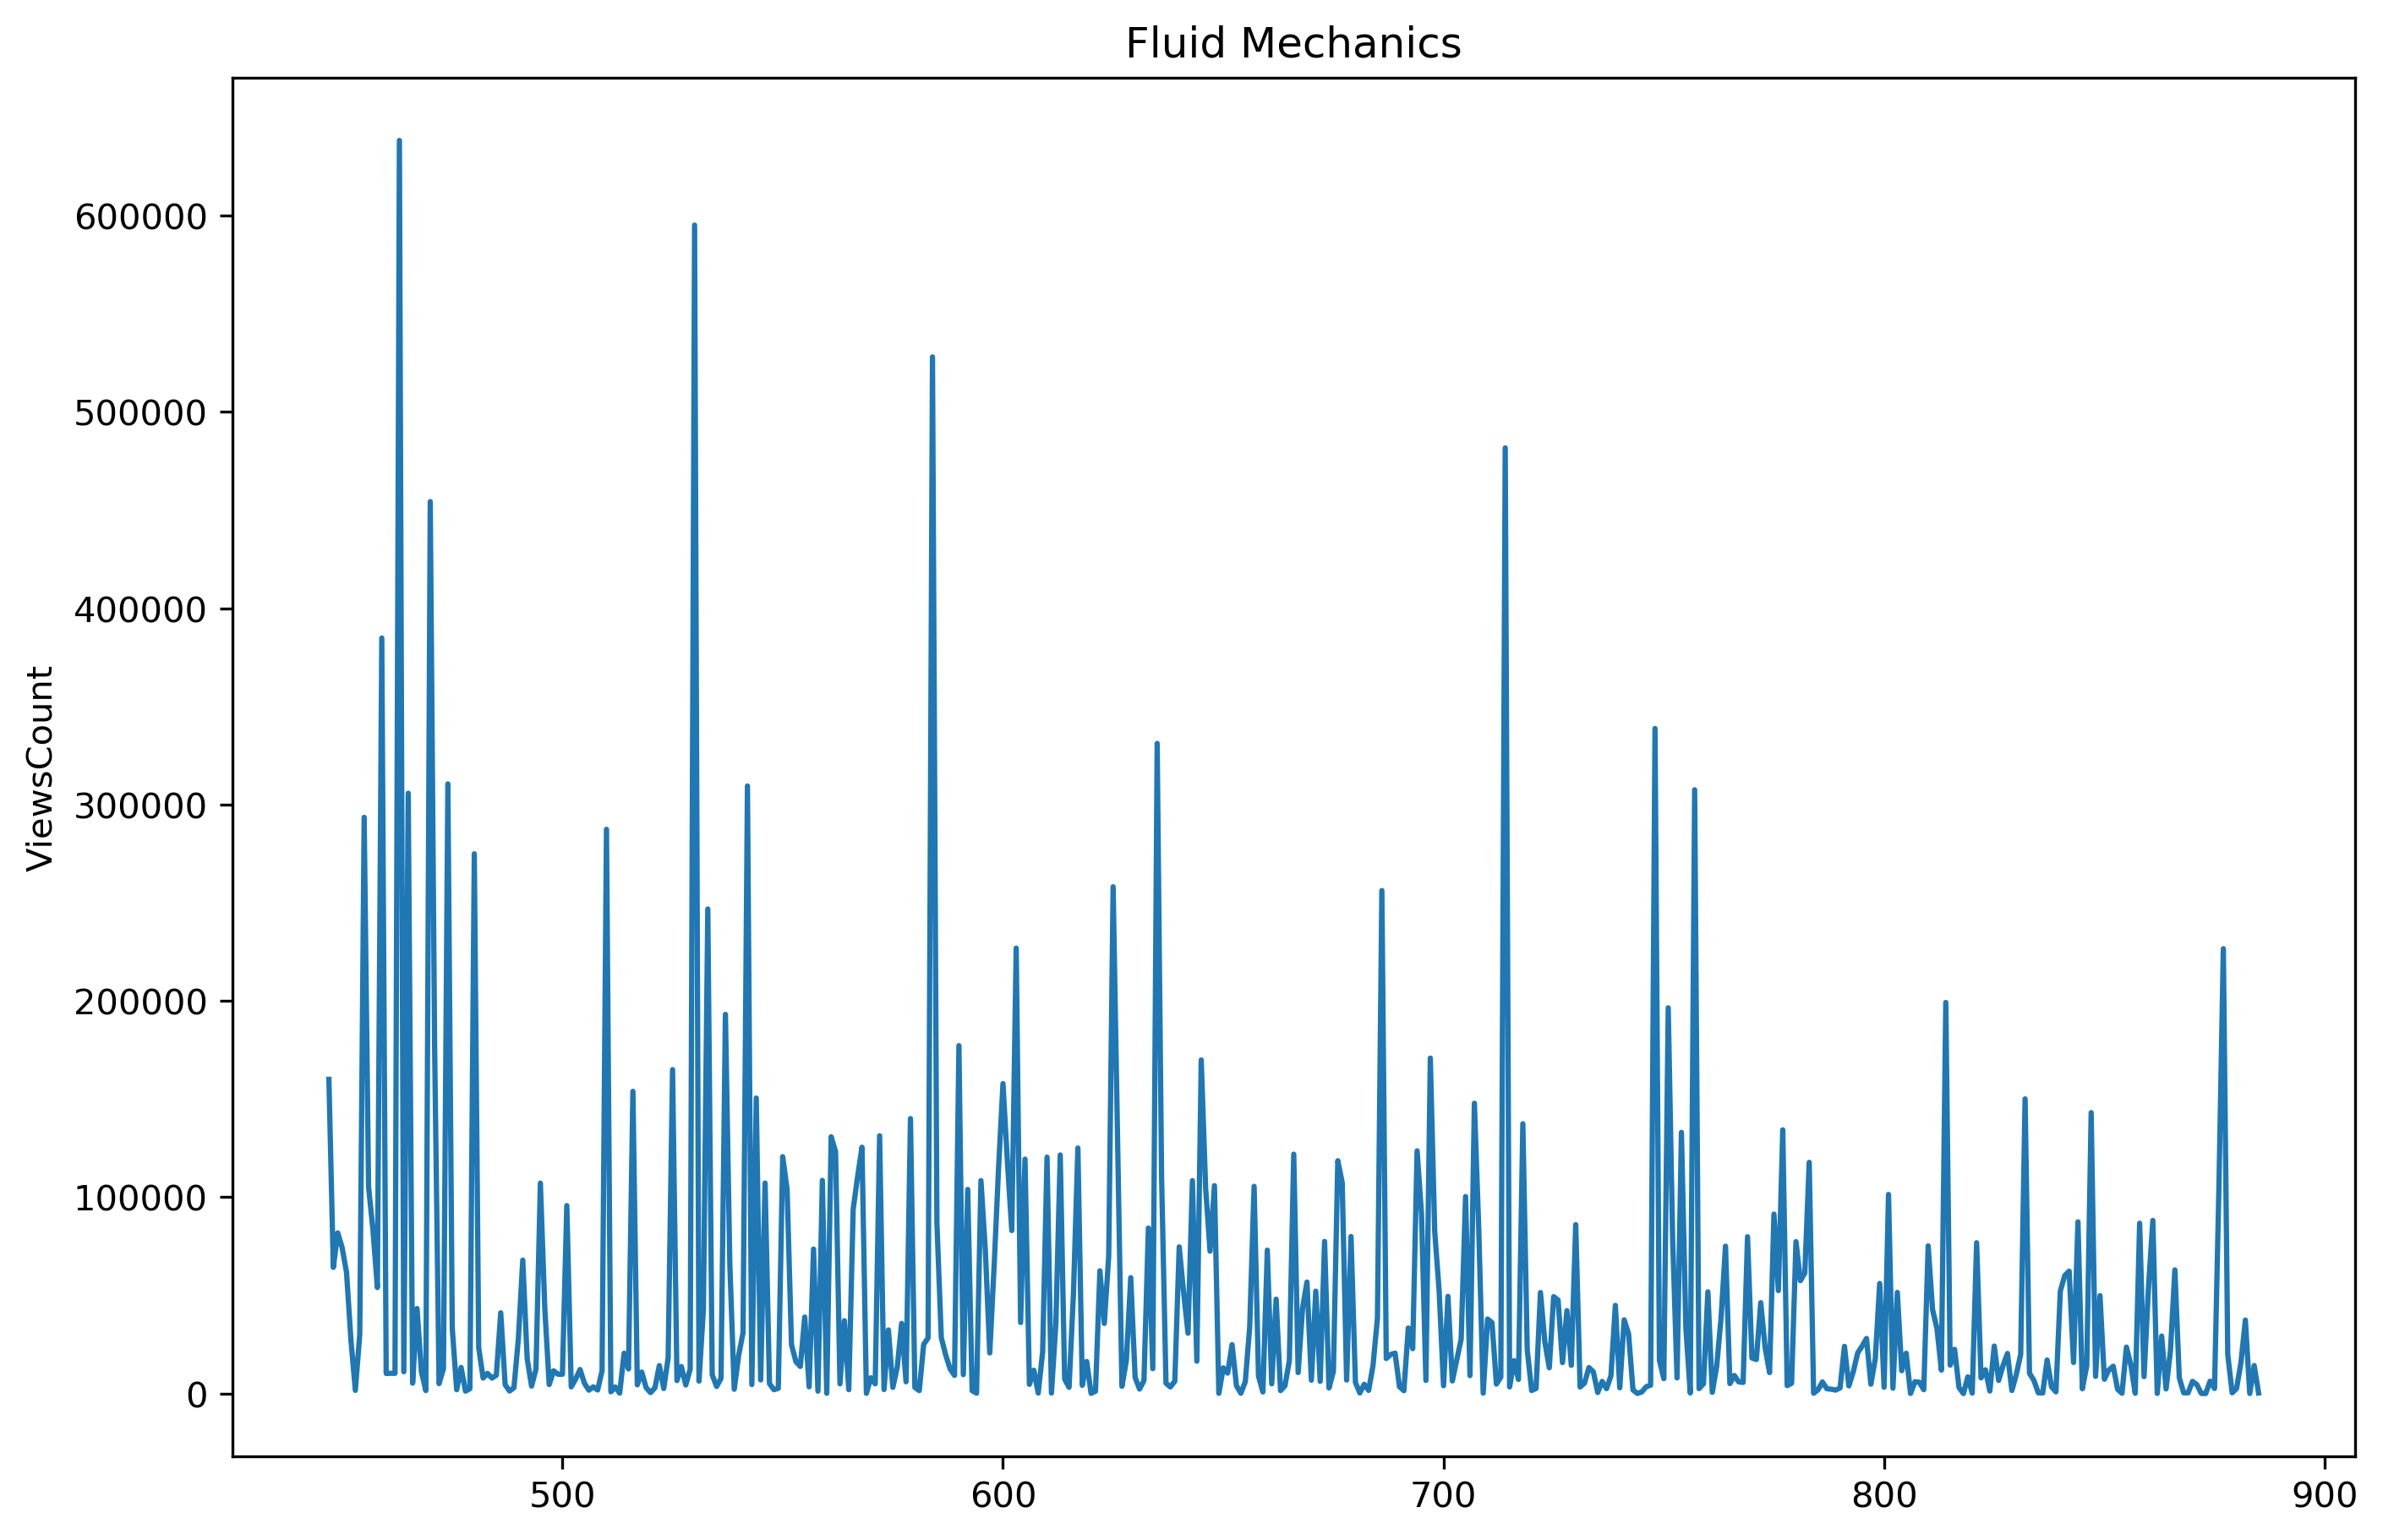

In [203]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.plot(dh2["Views"])
plt.ylabel('ViewsCount')
plt.title("Fluid Mechanics")

Text(0.5, 1.0, 'Data Science')

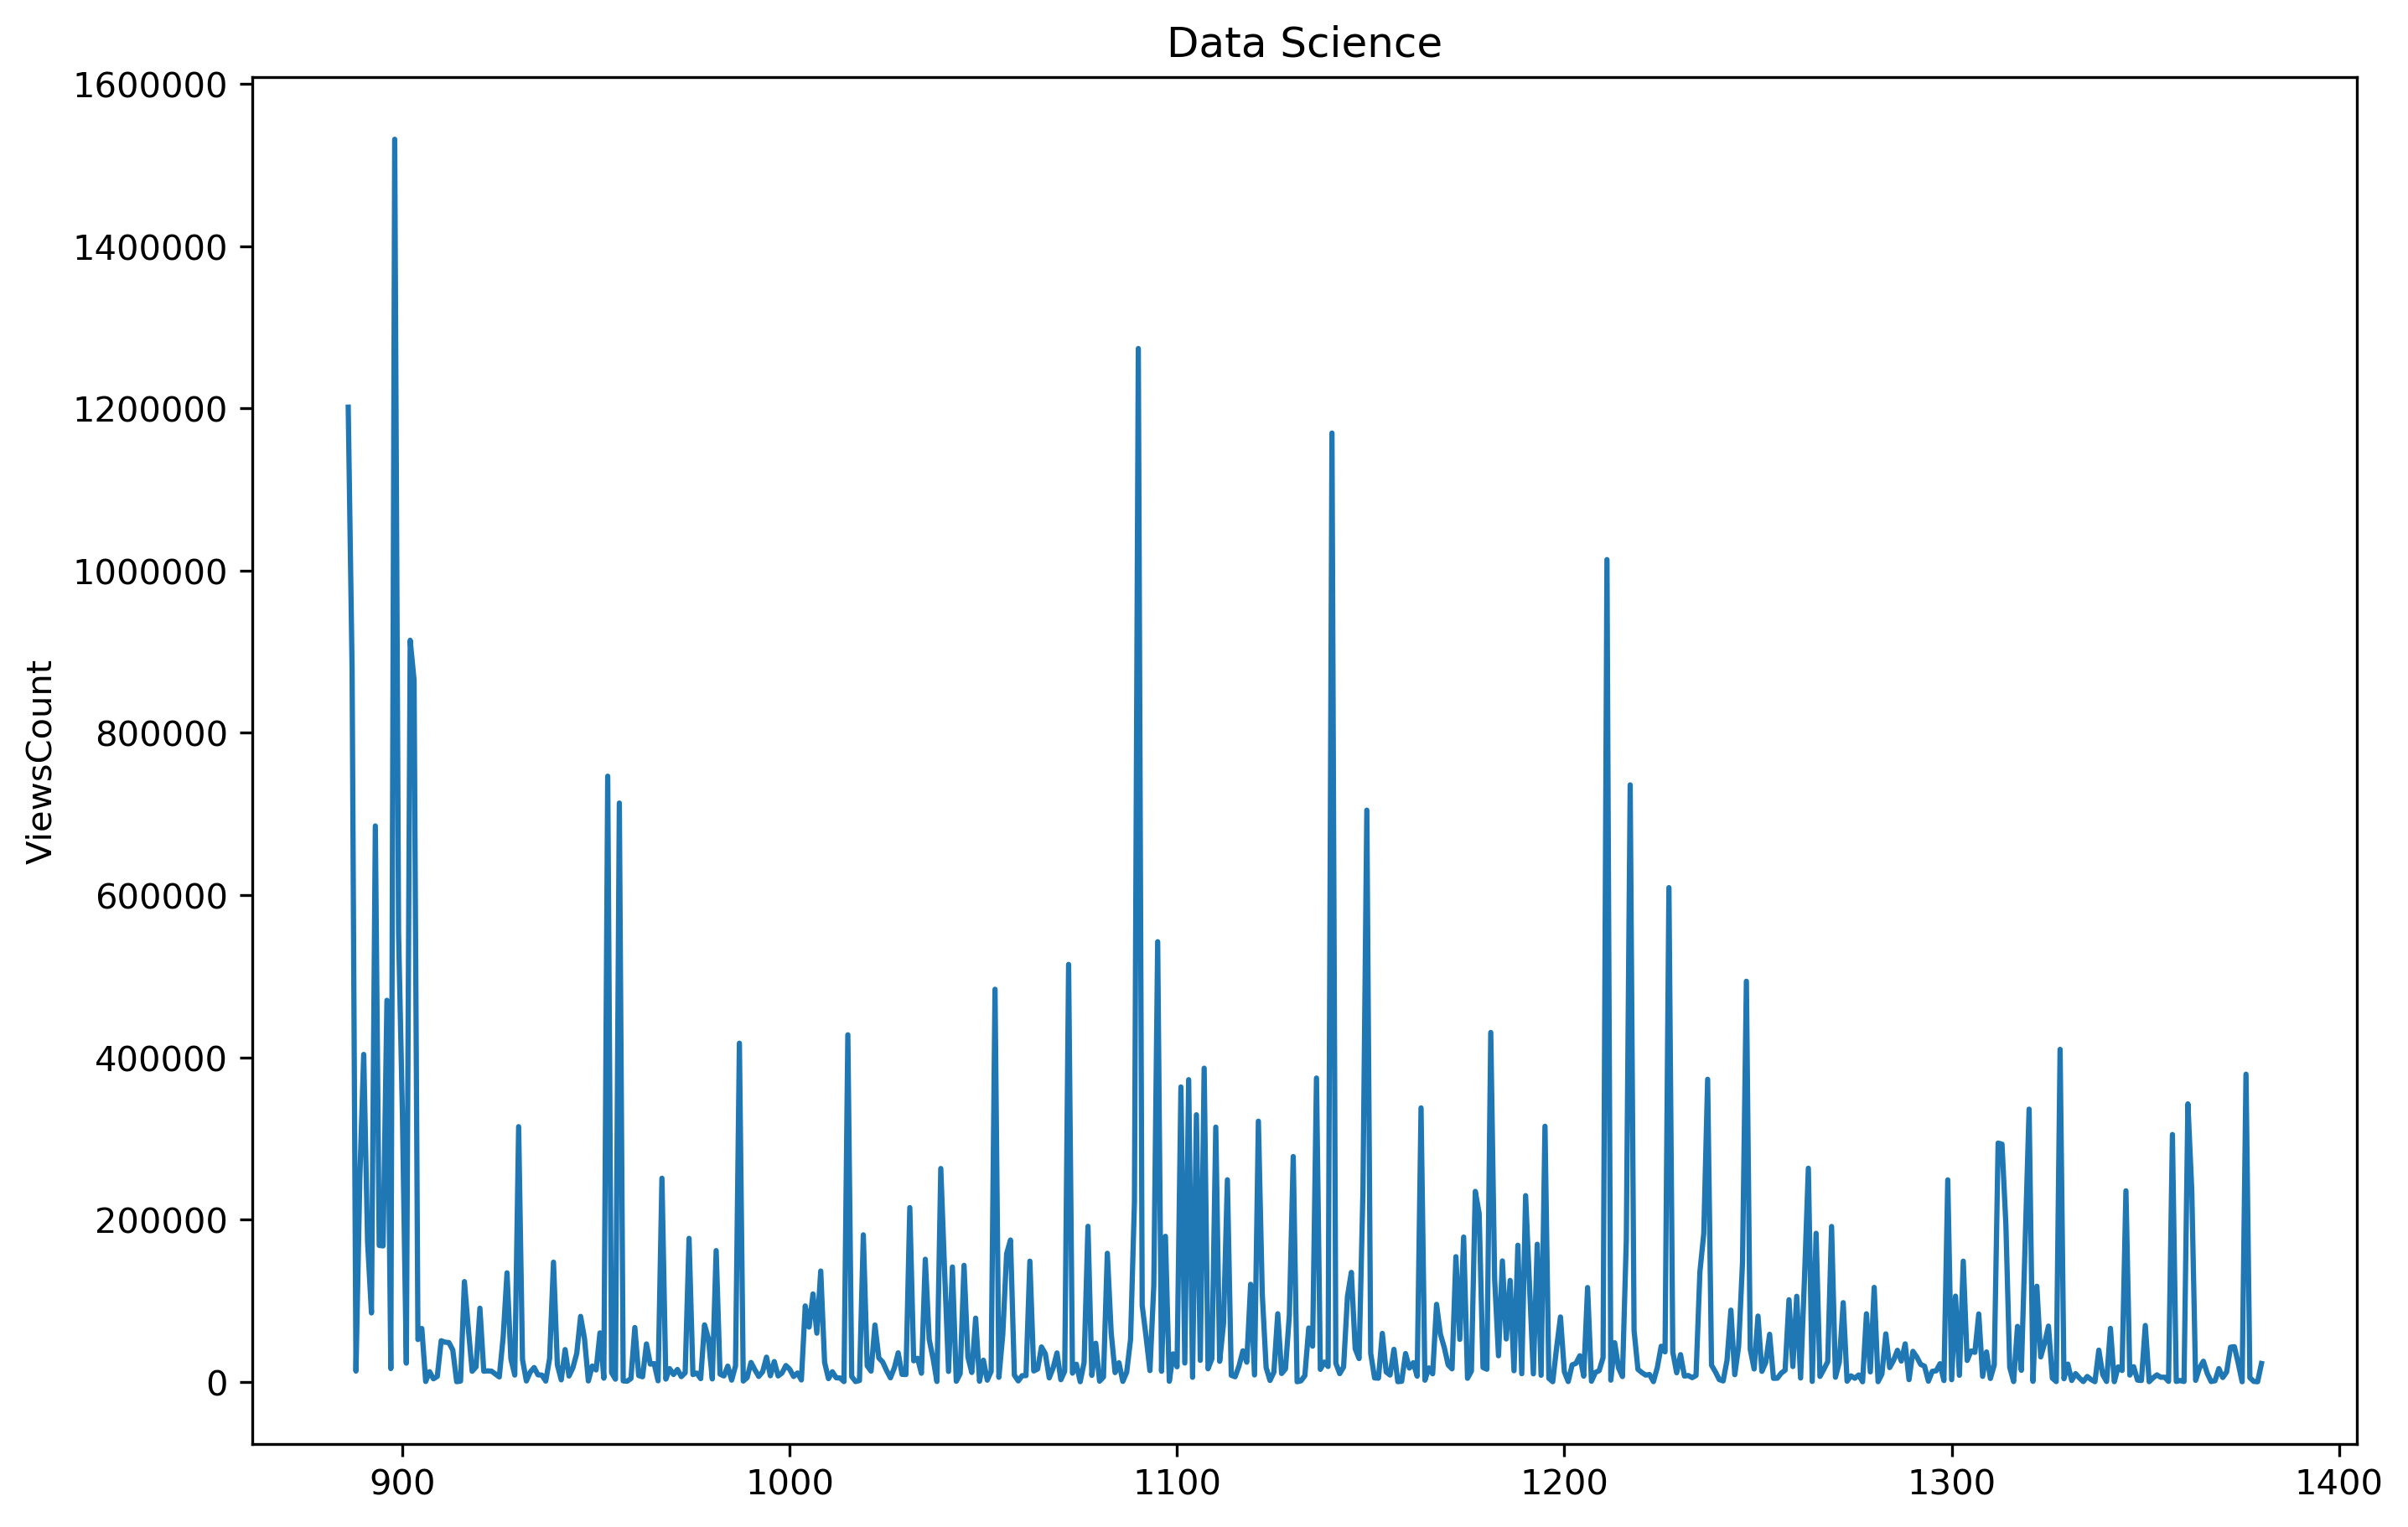

In [204]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.plot(dh3["Views"])
plt.ylabel('ViewsCount')
plt.title("Data Science")

### From the Above three plots we can observe that Data Science Topic has more views than any other topic

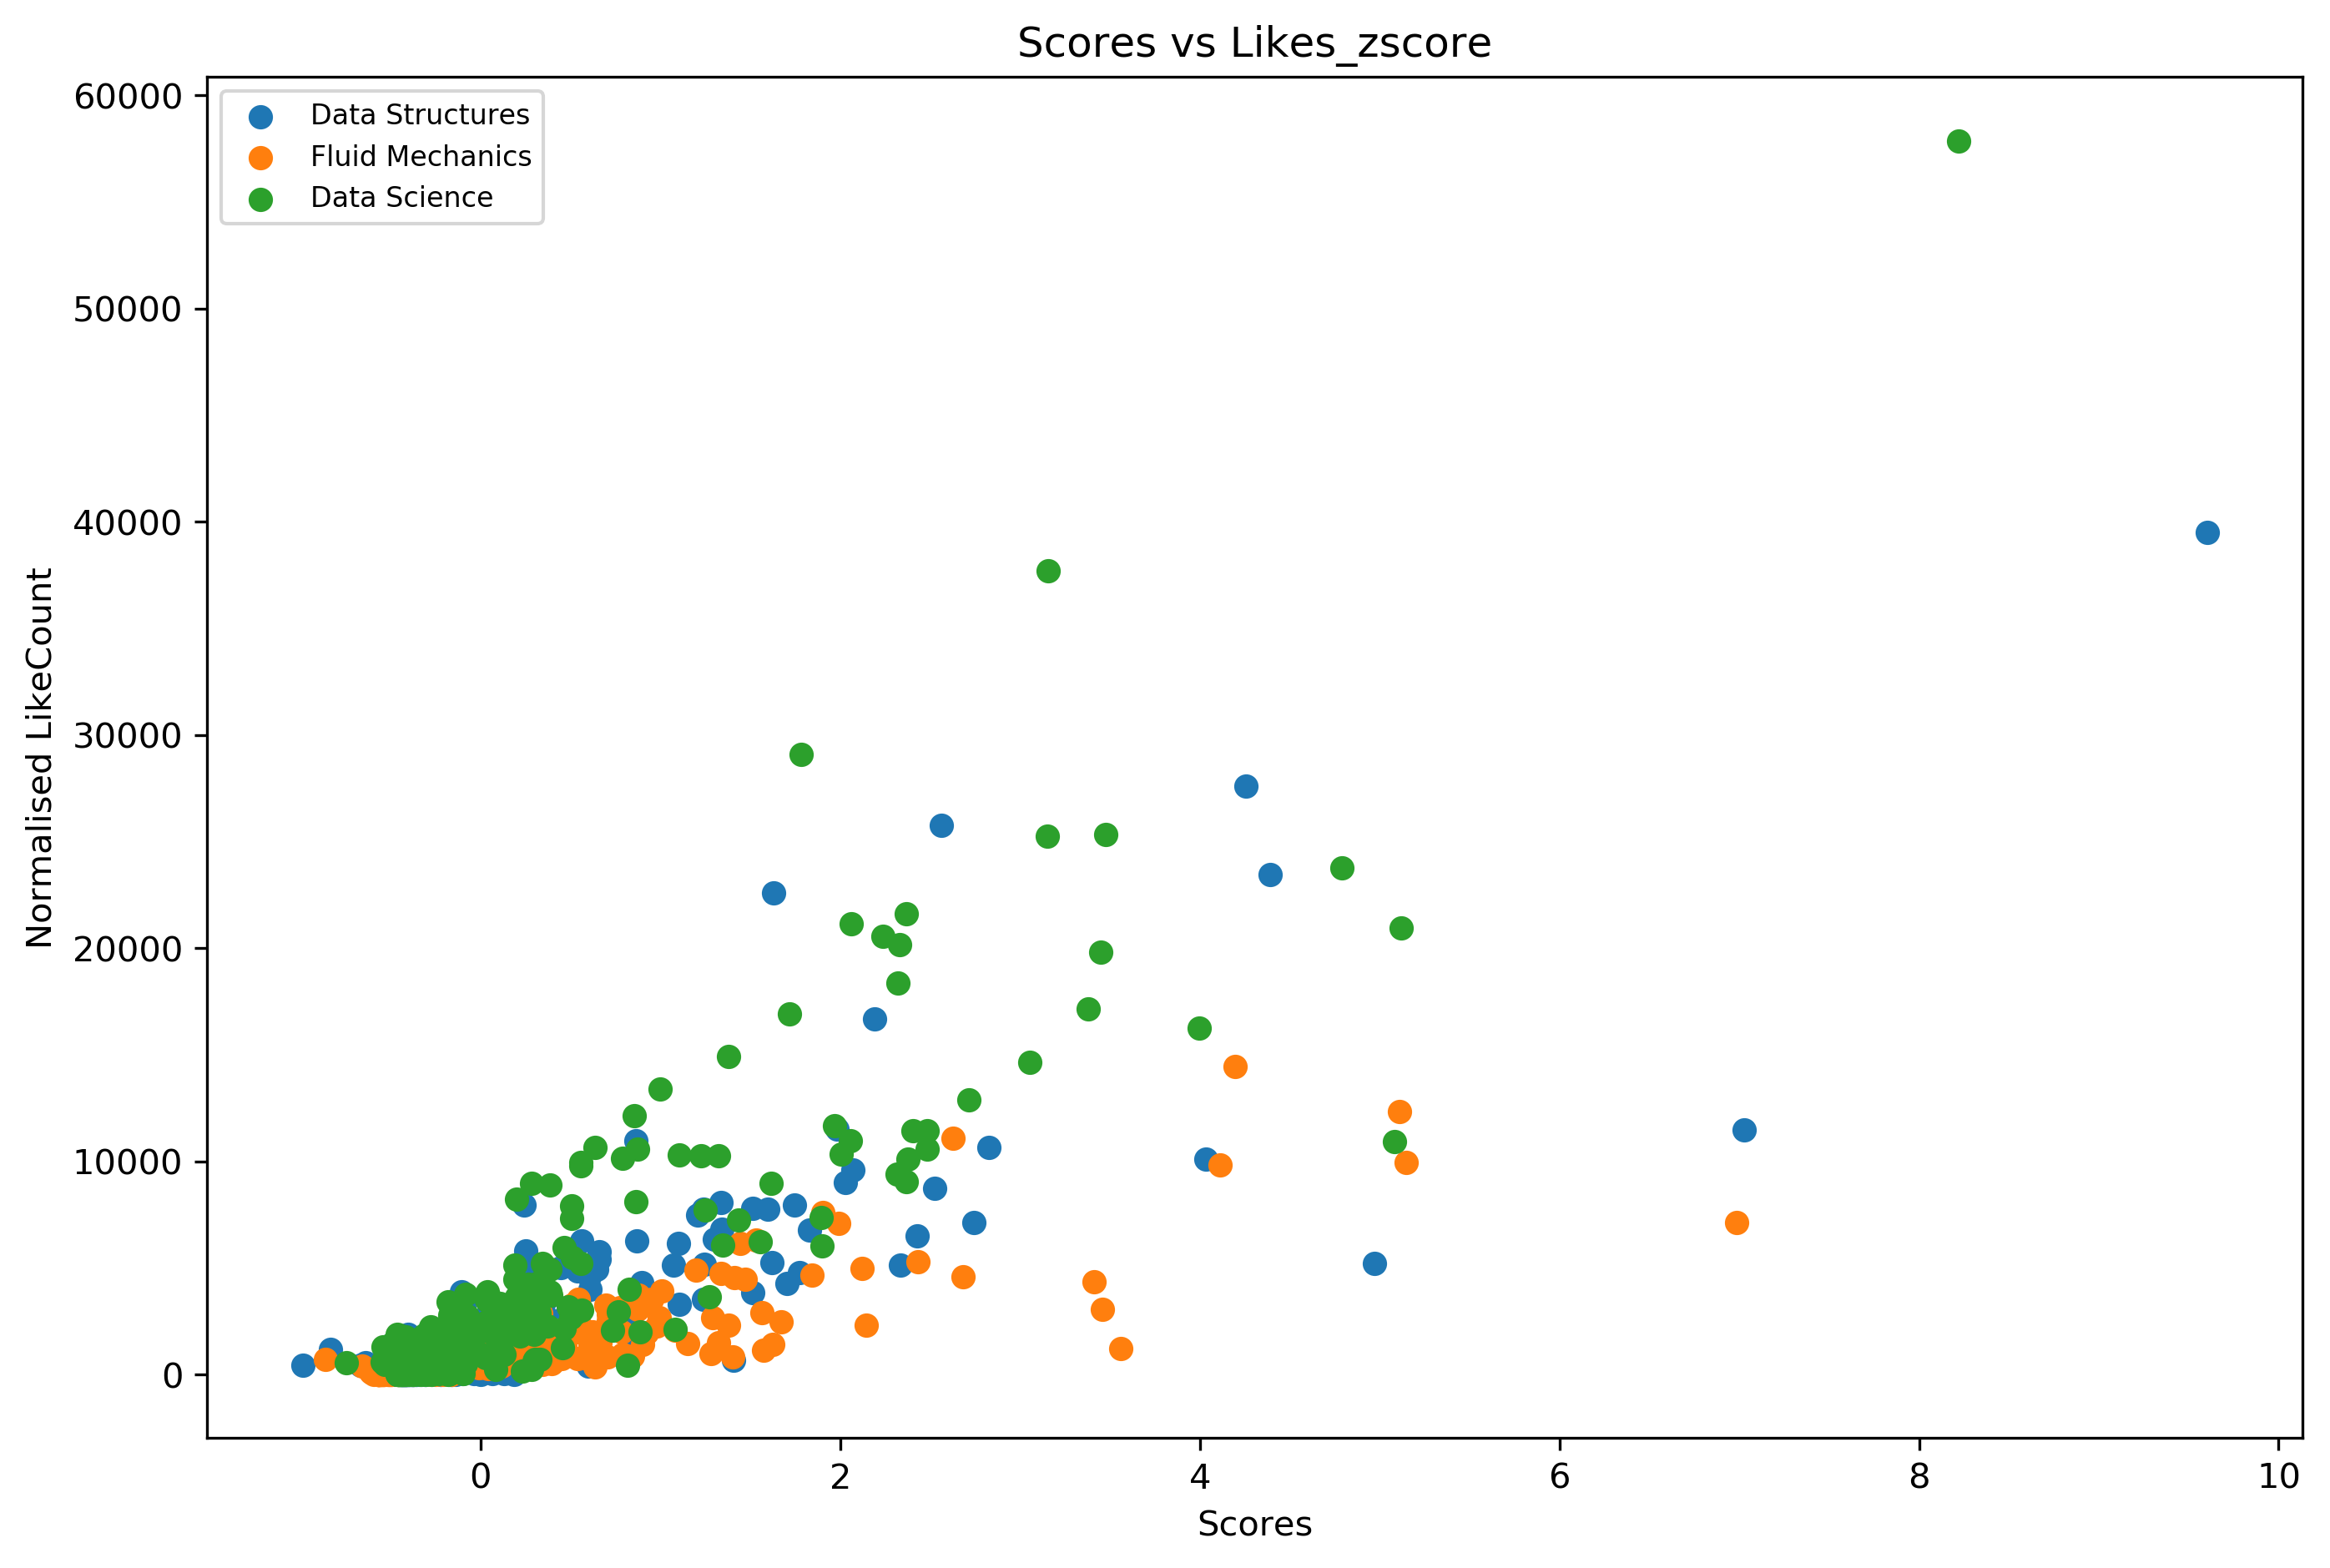

In [79]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.title("Scores vs Likes_zscore")
plt.xlabel('Scores')
plt.ylabel('Normalised LikeCount')
ax=plt.scatter(dh1["Scores"],dh1["Likes"])
bx=plt.scatter(dh2["Scores"],dh2["Likes"])
cx=plt.scatter(dh3["Scores"],dh3["Likes"])
plt.legend((ax, bx, cx),('Data Structures', 'Fluid Mechanics', 'Data Science'),loc='upper left',scatterpoints=1,ncol=1,fontsize=8)
plt.show()

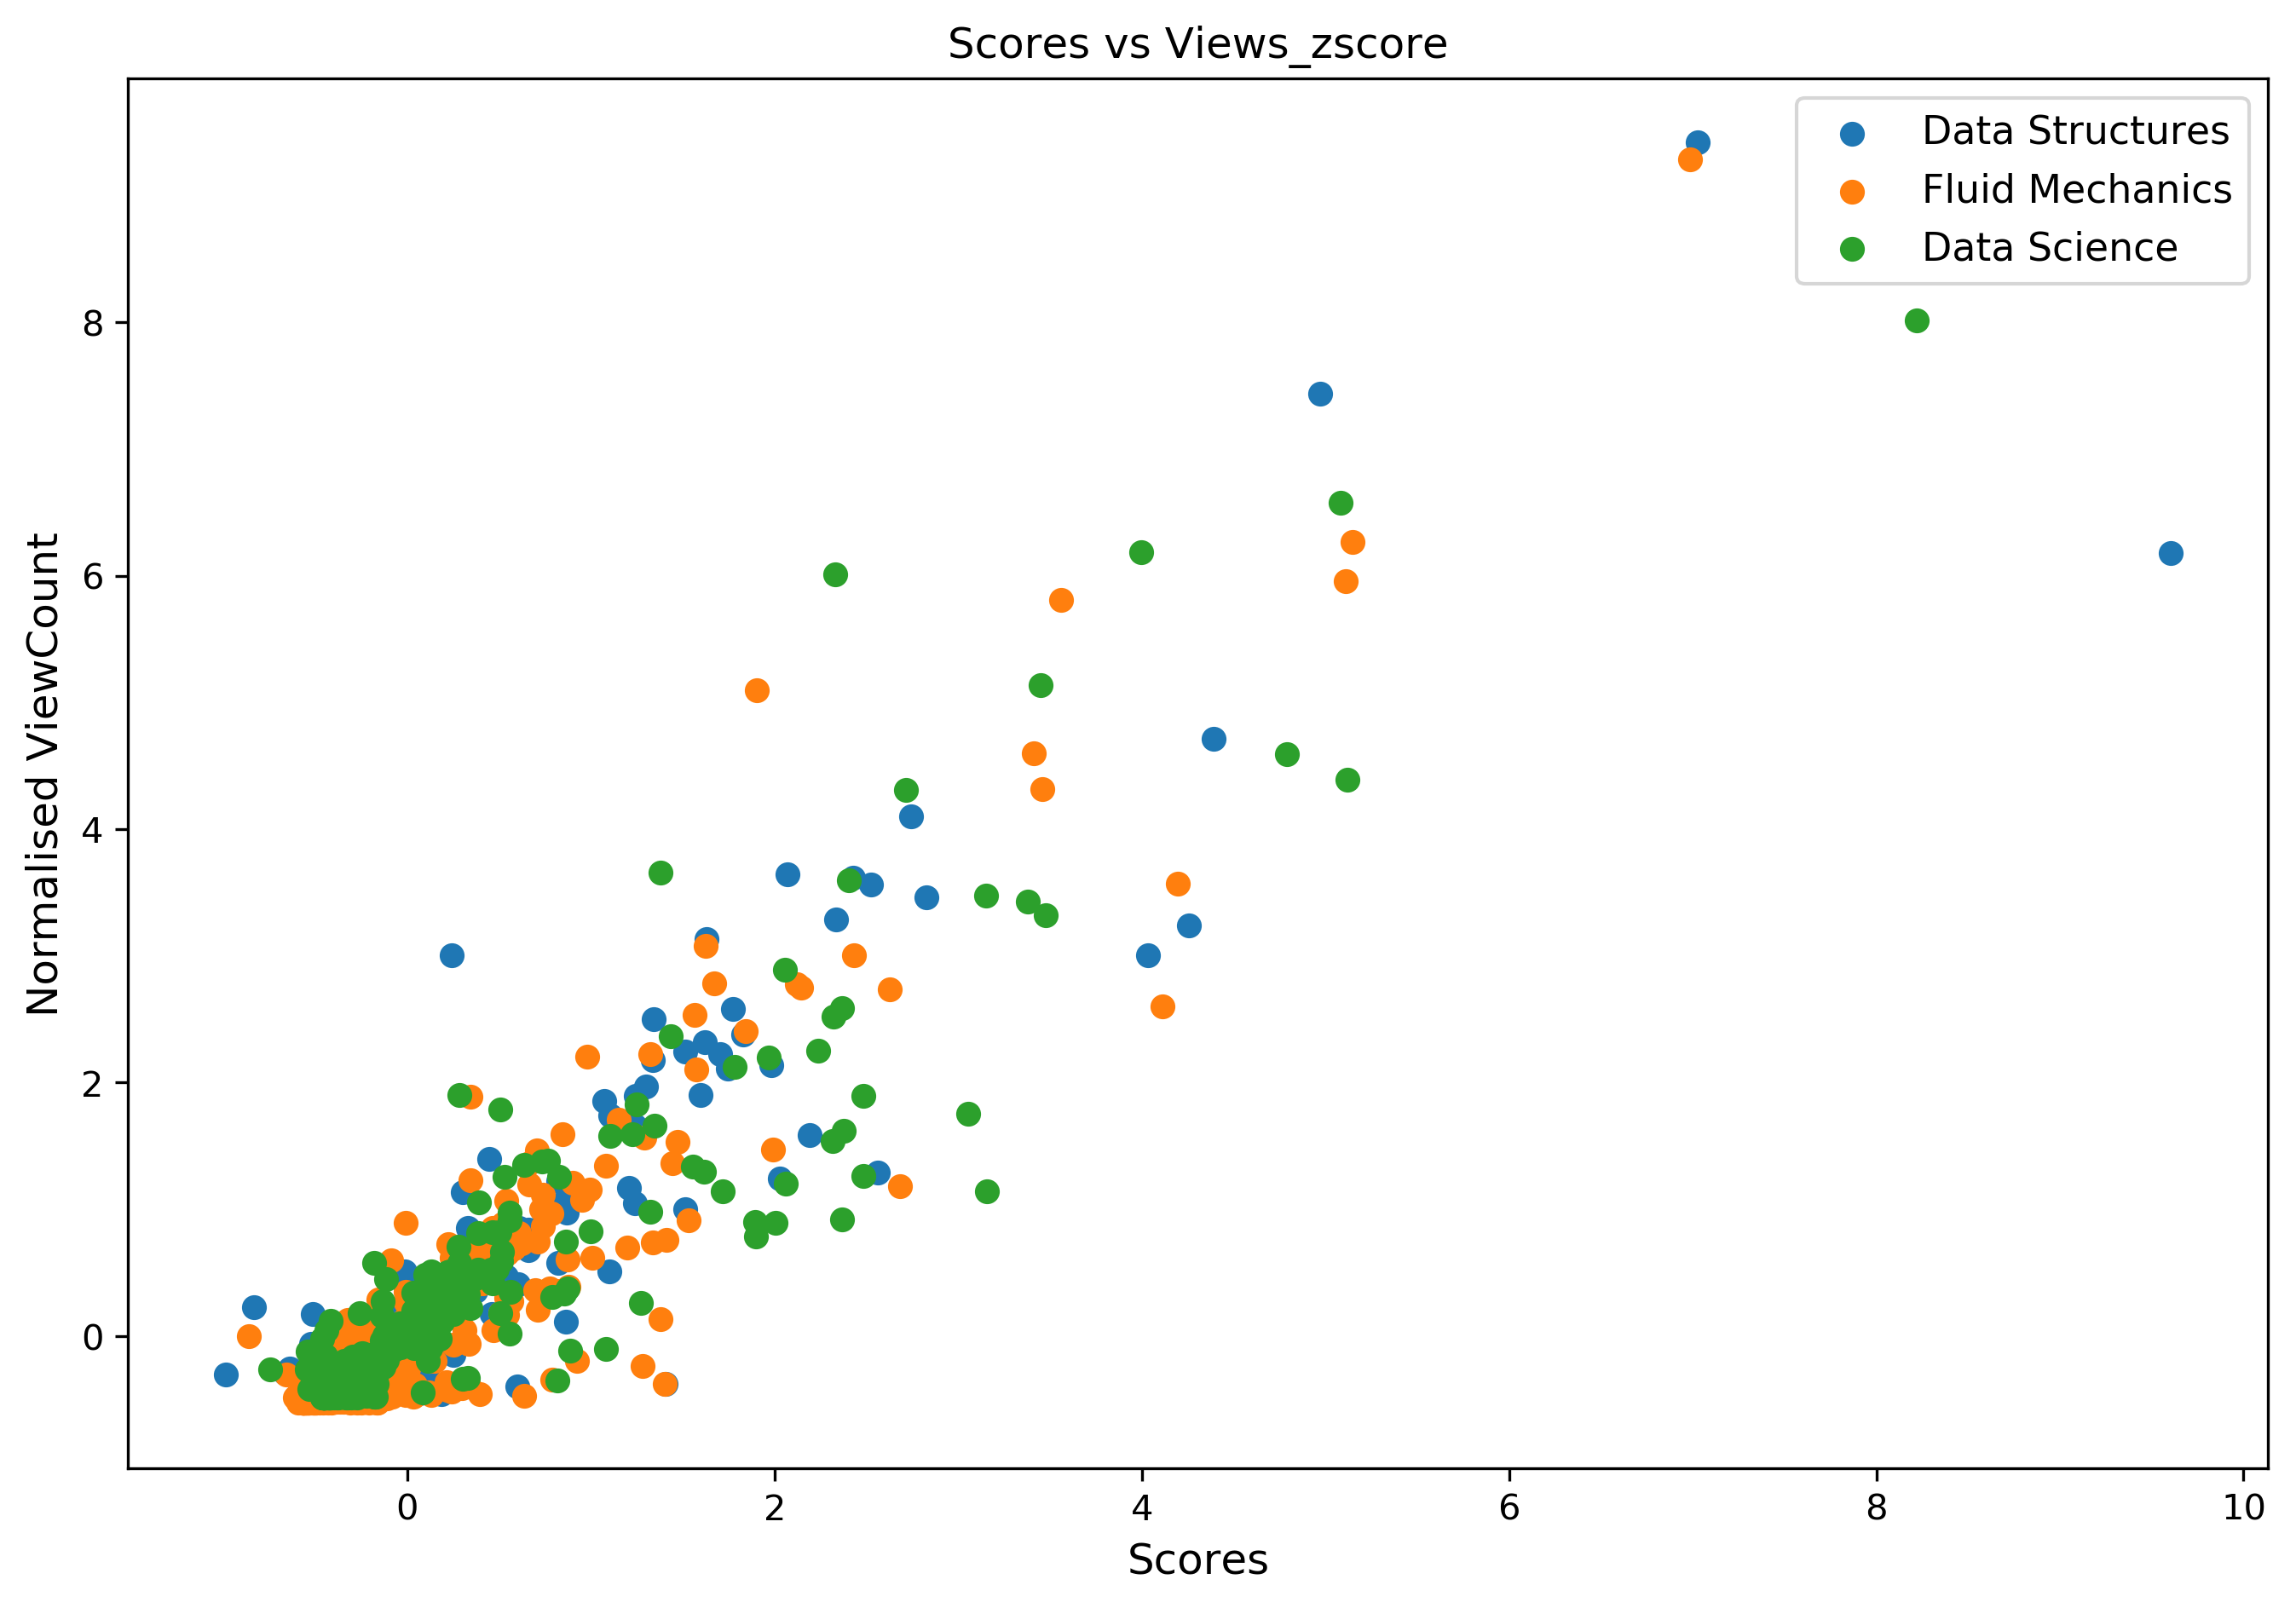

In [75]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.title("Scores vs Views_zscore")
plt.xlabel('Scores',fontsize=12)
plt.ylabel('Normalised ViewCount',fontsize=12)
ax=plt.scatter(dh1["Scores"],dh1["Views_zscore"])
bx=plt.scatter(dh2["Scores"],dh2["Views_zscore"])
cx=plt.scatter(dh3["Scores"],dh3["Views_zscore"])
plt.legend((ax, bx, cx),('Data Structures', 'Fluid Mechanics', 'Data Science'),scatterpoints=1,ncol=1,fontsize=11)
plt.show()

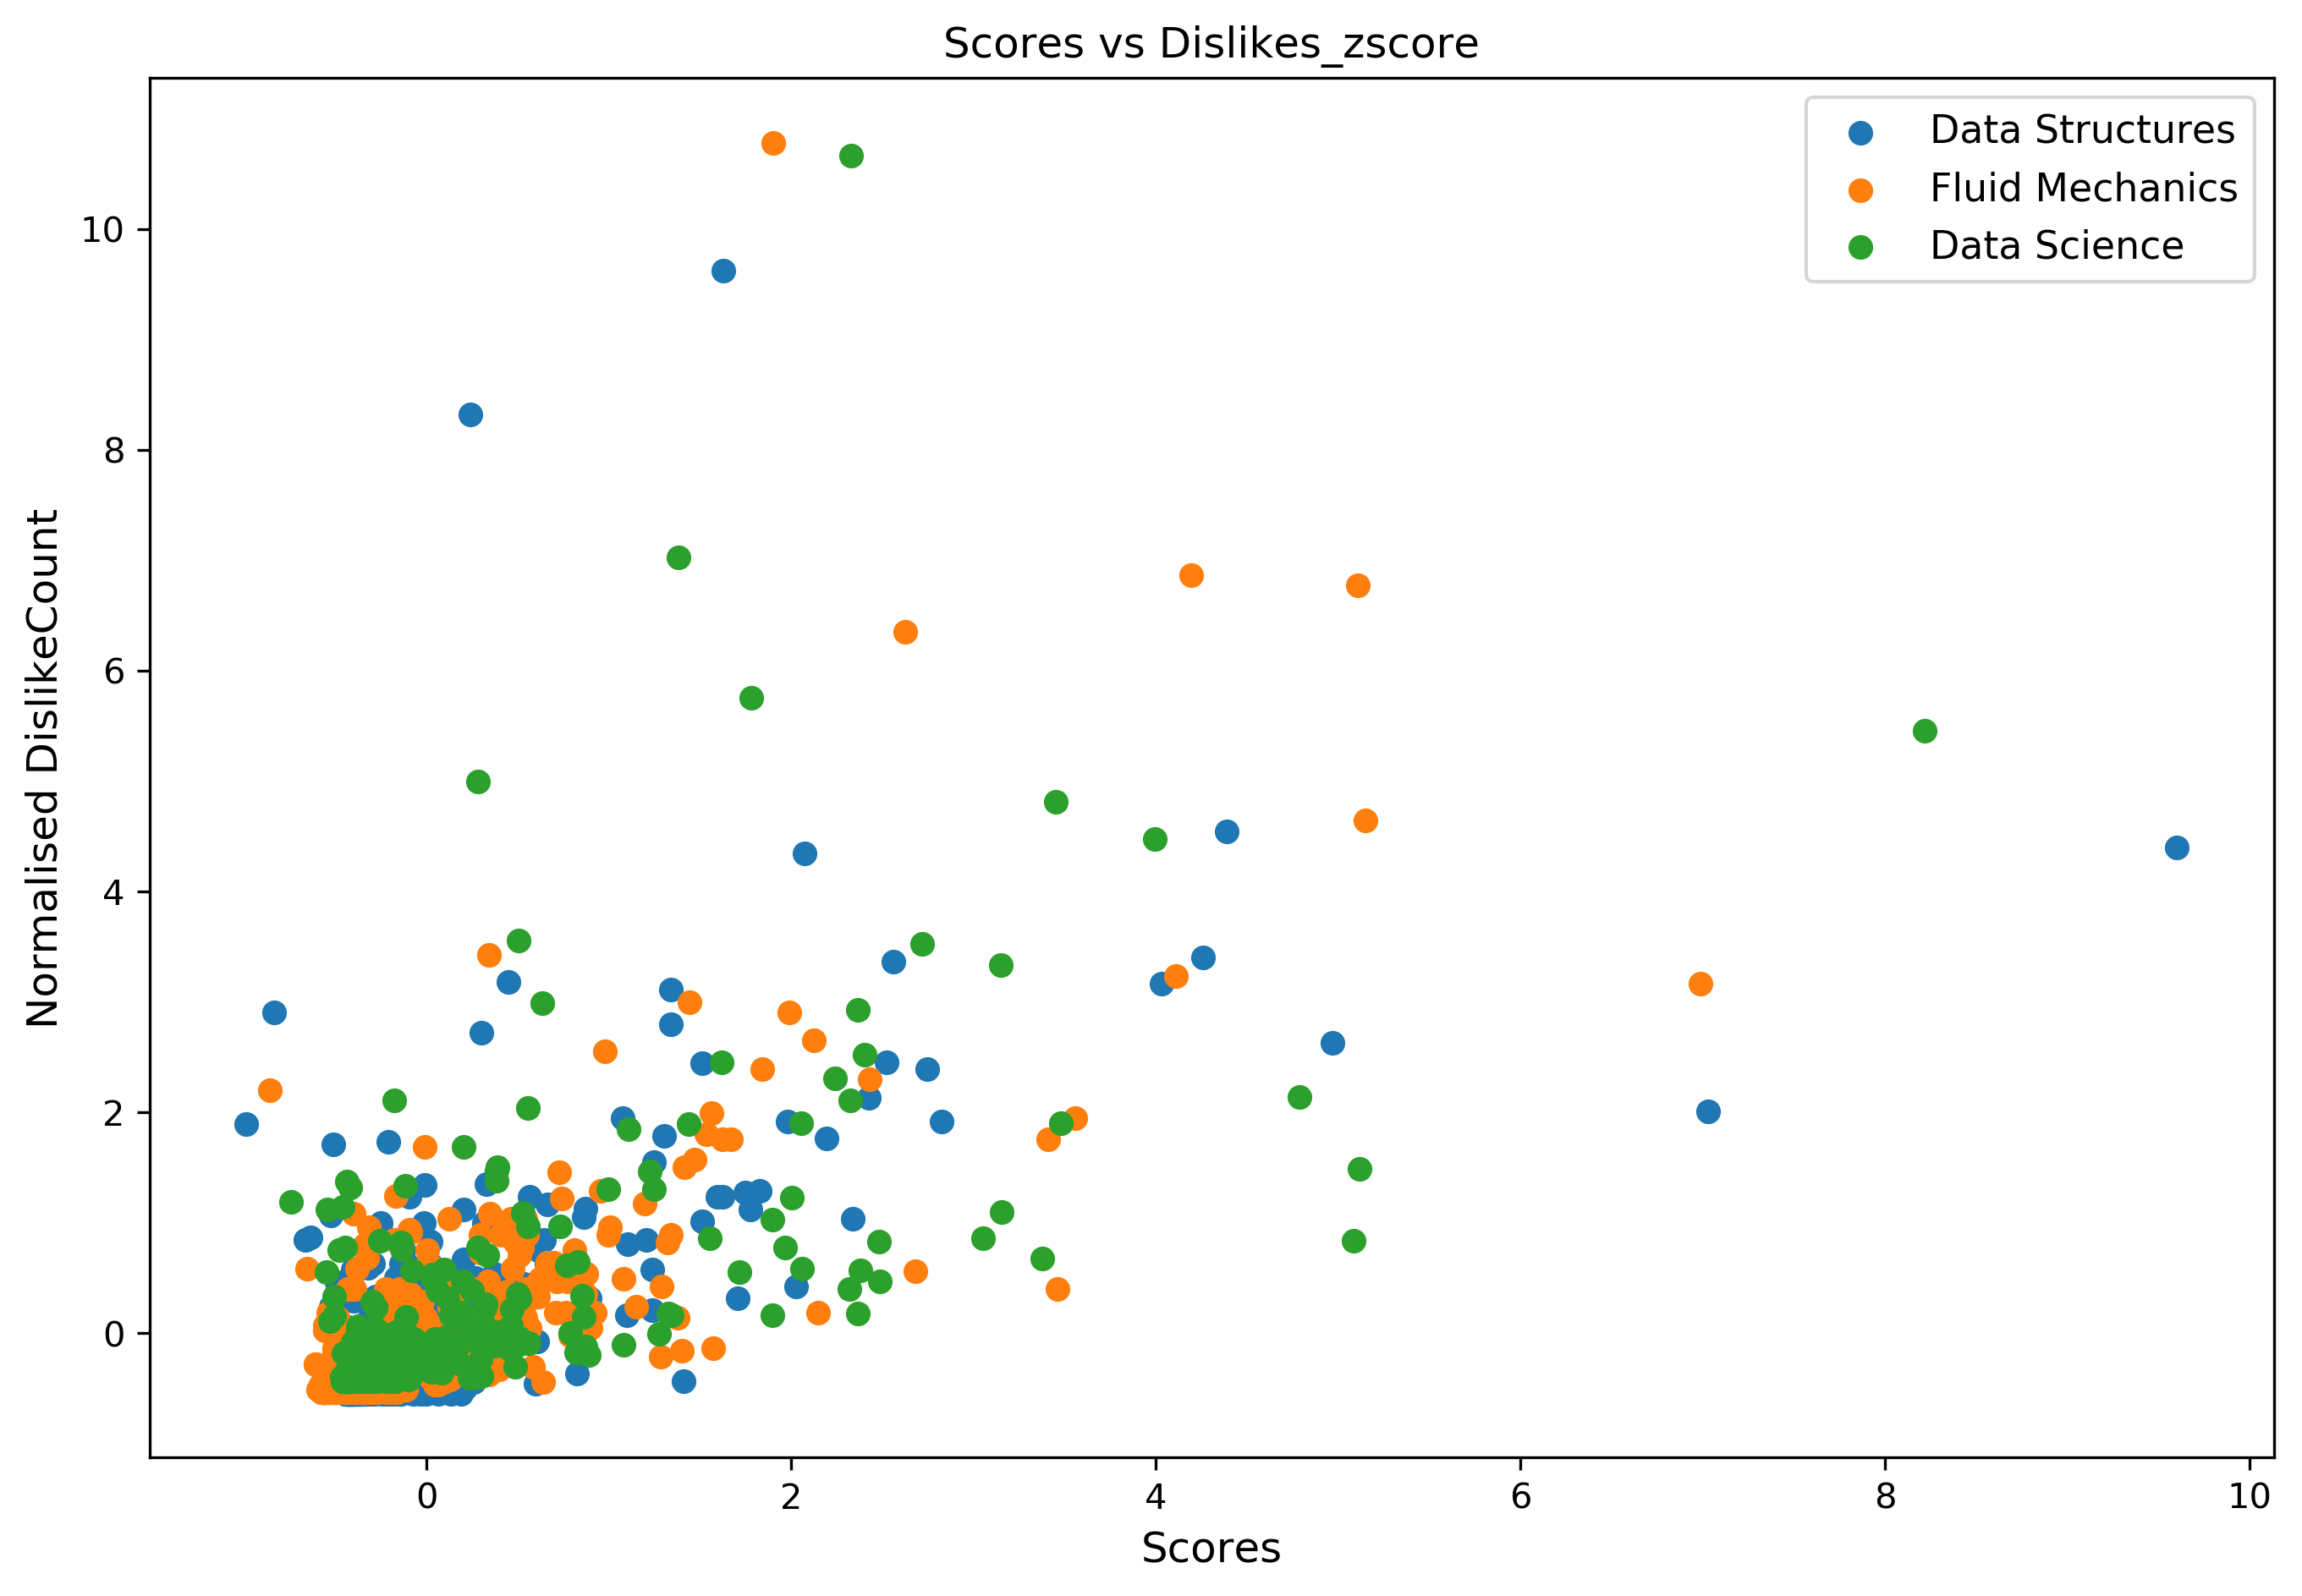

In [89]:
plt.figure(figsize=[10.8,7.2],dpi=300)
plt.title("Scores vs Dislikes_zscore")
plt.xlabel('Scores',fontsize=12)
plt.ylabel('Normalised DislikeCount',fontsize=12)
ax=plt.scatter(dh1["Scores"],dh1["Dislikes_zscore"])
bx=plt.scatter(dh2["Scores"],dh2["Dislikes_zscore"])
cx=plt.scatter(dh3["Scores"],dh3["Dislikes_zscore"])
plt.legend((ax, bx, cx),('Data Structures', 'Fluid Mechanics', 'Data Science'),scatterpoints=1,ncol=1,fontsize=11)
plt.show()

## Playlist Creation

In [142]:
#Creating URL using the Video Ids for Data Structures Topic in a list for playlist creation
Data_Structure_Playlist=[]
s=0
i=0
while (i<len(dh1.index) and s<60*60*8):
    s=s+dh1["Duration"][i]
    Data_Structure_Playlist.append('www.youtube.com/watch?v='+dh1["Video_ID"][i])
    i=i+1

In [144]:
#Creating URL using the Video Ids for Fluid Mechanics Topic in a list for playlist creation
FluidMechanics_Playlist=[]
s=0
i=0
while (i<len(dh2.index) and s<60*60*8):
    s=s+dh2["Duration"][i]
    FluidMechanics_Playlist.append('www.youtube.com/watch?v='+dh2["Video_ID"][i])
    i=i+1

In [145]:
#Creating URL using the Video Ids for Data Science Topic in a list for playlist creation
DataScience_Playlist=[]
s=0
i=0
while (i<len(dh3.index) and s<60*60*8):
    s=s+dh3["Duration"][i]
    DataScience_Playlist.append('www.youtube.com/watch?v='+dh3["Video_ID"][i])
    i=i+1

In [198]:
#Displaying the Created Playlist
print("Data Structures\n",Data_Structure_Playlist)
print("\nFluid Mechanics\n",FluidMechanics_Playlist)
print("\nData Science\n",DataScience_Playlist)

Data Structures
 ['www.youtube.com/watch?v=RBSGKlAvoiM']

Fluid Mechanics
 ['www.youtube.com/watch?v=brN9citH0RA', 'www.youtube.com/watch?v=fJefjG3xhW0', 'www.youtube.com/watch?v=kOGw8hjBTCQ', 'www.youtube.com/watch?v=XKHRdnaHzmI', 'www.youtube.com/watch?v=hv_Vixhp7us']

Data Science
 ['www.youtube.com/watch?v=xC-c7E5PK0Y', 'www.youtube.com/watch?v=-ETQ97mXXF0']
